# PLANT DISEASE DETECTION

## Using the Convolutional Neural NetWorks 

In [1]:
!pip install tensorflow==2.9.1
import tensorflow as tf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 91.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 86.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 36.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall:

In [2]:
print(tf.__version__)

2.9.1


## downloading the dataset

In [3]:
!pip install opendatasets

In [5]:
#we are downloading the dataset from kaggle 

import opendatasets as od

dataset_url='https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset'

od.download(dataset_url) 

Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)


In [6]:
import os 

print('Training Folder')
for dirpath,filename,dirname in os.walk('/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')

Training Folder
There are 38 directories,0 images in /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
There are 0 directories,1851 images in /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight
There are 0 directories,1926 images in /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy
There are 0 directories,1692 images in /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___healthy
There are 0 directories,2010 images in /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Orange___Haunglongbing_(Citrus_greening)
There are 0 directories,2022 images in /kaggle/input/new-plant-diseases-dataset/N

In [7]:
print('Testing Folder')
for dirpath,filename,dirname in os.walk('/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')

Testing Folder
There are 38 directories,0 images in /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
There are 0 directories,463 images in /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight
There are 0 directories,481 images in /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___healthy
There are 0 directories,423 images in /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Grape___healthy
There are 0 directories,503 images in /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Orange___Haunglongbing_(Citrus_greening)
There are 0 directories,505 images in /kaggle/input/new-plant-diseases-dataset/New Pla

In [8]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

train_data = image_dataset_from_directory(train_dir,
                                             image_size=(224,224),
                                             label_mode='categorical',
                                             batch_size=32)

test_data = image_dataset_from_directory(test_dir,
                                         image_size=(224,224),
                                         label_mode='categorical',
                                         batch_size=32)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [9]:
train_data,test_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>)

In [10]:
class_names = train_data.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os 
def get_random_image(directory,class_names=class_names):
  rn = random.randint(0,len(class_names)-1)
  choice = random.choice(os.listdir(os.path.join(directory,class_names[rn])))
  img_path= os.path.join(directory,class_names[rn],choice)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  fontsize=10
  plt.title(class_names[rn],fontdict={'fontsize': fontsize})
  plt.axis(False)

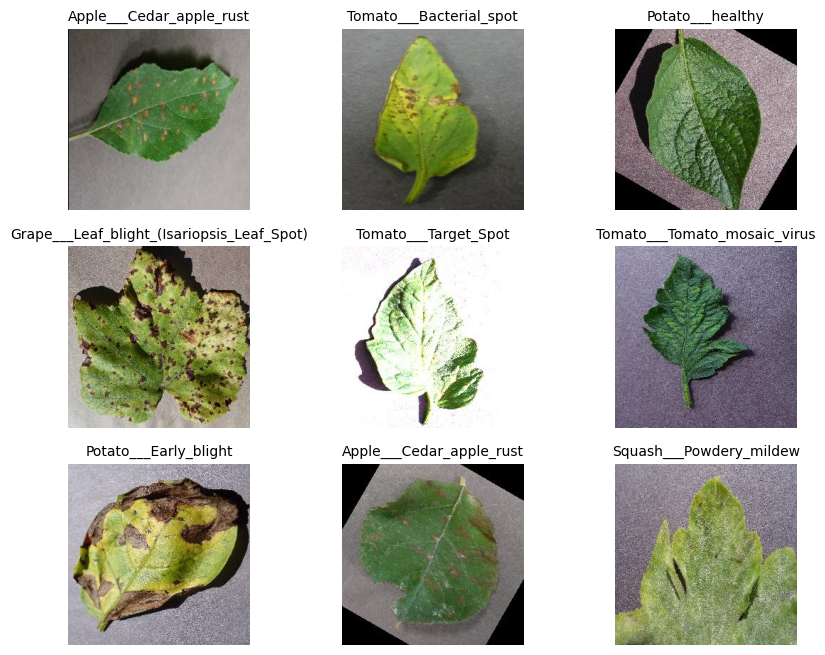

In [12]:
plt.figure(figsize=(10,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  get_random_image(train_dir)

In [13]:
import tensorflow as tf
from tensorflow.keras import layers

image_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False,)
base_model.trainable = False

inputs =  layers.Input(shape = image_shape,name='input_layer')

x = base_model(inputs)

x = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_layer')(x)

outputs = layers.Dense(38,activation='softmax',name='output_layer')(x)

feature_model = tf.keras.Model(inputs,outputs,name='plant_disease_model')


16705208/16705208 [==============================] - 0s 0us/step


In [14]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
  layer.trainable = False

feature_model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

In [15]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [16]:
feature_model.summary()

Model: "plant_disease_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 GlobalAveragePooling2D_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 38)                48678     
                                                                 
Total params: 4,098,249
Trainable params: 1,399,638
Non-trainable params: 2,698,611
_________________________________________________________________


In [17]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  patience=3)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, 
                                                 patience=2,
                                                 verbose=1, 
                                                 min_lr=1e-7)

checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      save_best_only=True,
                                                      monitor="val_loss")


In [19]:
initial_epochs = 5

history1 = feature_model.fit(train_data,epochs=initial_epochs,
                  steps_per_epoch=len(train_data),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  callbacks=[early_stopping,
                             model_checkpoint,
                             reduce_lr,
                             create_tensorboard_callback('plant_disease_model',
                                                         'EfficientNetB010')])

Saving TensorBoard log files to: plant_disease_model/EfficientNetB010/20240428-150246
Epoch 1/5
2197/2197 [==============================] - 3376s 2s/step - loss: 0.1387 - accuracy: 0.9582 - val_loss: 0.0368 - val_accuracy: 0.9880 - lr: 0.0010
Epoch 2/5
2197/2197 [==============================] - 3330s 2s/step - loss: 0.0437 - accuracy: 0.9855 - val_loss: 0.0255 - val_accuracy: 0.9922 - lr: 0.0010
Epoch 3/5
2197/2197 [==============================] - 3302s 2s/step - loss: 0.0306 - accuracy: 0.9897 - val_loss: 0.0293 - val_accuracy: 0.9907 - lr: 0.0010
Epoch 4/5
2197/2197 [==============================] - 3284s 1s/step - loss: 0.0257 - accuracy: 0.9912 - val_loss: 0.0177 - val_accuracy: 0.9944 - lr: 0.0010
Epoch 5/5
2197/2197 [==============================] - 3282s 1s/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.0292 - val_accuracy: 0.9919 - lr: 0.0010


In [21]:
feature_model.save('./Leaf Deases(96,88).h5')

In [22]:
feature_model.load_weights(checkpoint_path)

In [23]:
feature_model.evaluate(test_data)

550/550 [==============================] - 597s 1s/step - loss: 0.0177 - accuracy: 0.9944


[0.017718404531478882, 0.9943660497665405]

In [24]:
import matplotlib.pyplot as plt

def plot_history(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = history1.epoch

  acc = history.history['accuracy']
  val_acc =history.history['val_accuracy']

  plt.figure(figsize=(8,10))
  plt.subplot(2,1,1)
  plt.plot(epochs,loss)
  plt.plot(epochs,val_loss)
  plt.title('Training_loss vs Validation_loss')

  plt.subplot(2,1,2)
  plt.plot(epochs,acc)
  plt.plot(epochs,val_acc)
  plt.title('Training_accuracy vs Validation_accuracy')

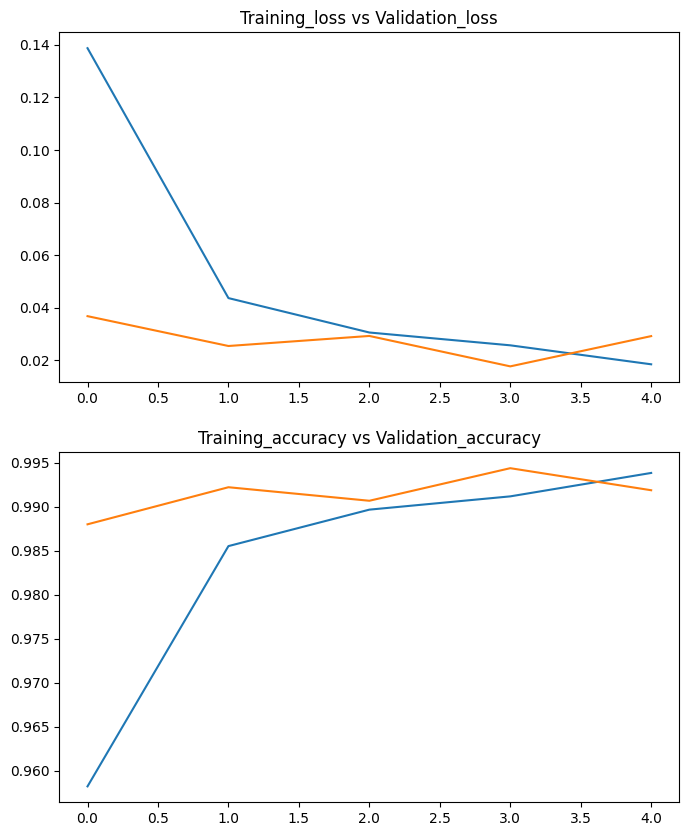

In [25]:
plot_history(history1)

In [26]:
feature_model.save('best_plant_model.h5')

In [27]:
def load_prep(img_path):
  img = tf.io.read_file(img_path)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img,size=(224,224))

  return img

Text(0.5, 0.98, '(224, 224, 3)')

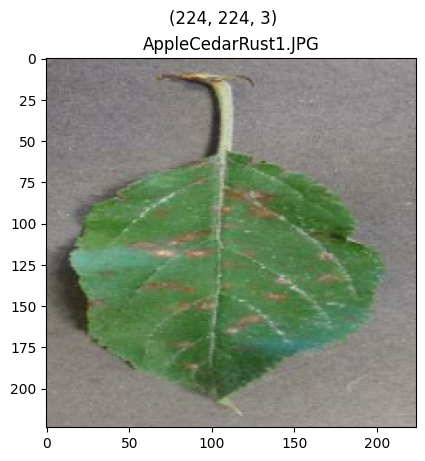

In [28]:
image = load_prep('/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust2.JPG')
plt.imshow(image/255.)
plt.title('AppleCedarRust1.JPG')
plt.suptitle(image.shape)

In [29]:
pred = feature_model.predict(tf.expand_dims(image,axis=0))
pred


1/1 [==============================] - 1s 1s/step


array([[1.1272806e-15, 2.5317256e-16, 1.0000000e+00, 1.4051769e-17,
        1.5123751e-22, 2.1940013e-14, 9.1438251e-20, 1.3345036e-14,
        8.1005683e-15, 1.4009439e-16, 1.6243631e-21, 1.5002168e-14,
        9.0403848e-12, 2.5682196e-18, 2.4393057e-20, 1.4040737e-16,
        1.3687437e-13, 1.1162834e-22, 2.6913813e-16, 2.6157229e-22,
        8.3101989e-18, 2.1445850e-17, 2.0581826e-25, 4.8025682e-19,
        7.1241145e-23, 1.9266781e-20, 2.7769287e-18, 1.8952392e-19,
        1.8125146e-15, 8.1874611e-15, 2.2214244e-16, 6.6524972e-16,
        2.7300113e-17, 2.1573820e-20, 1.5458000e-18, 1.2051193e-19,
        1.2602916e-21, 5.7622575e-19]], dtype=float32)

In [30]:
predicted_value = class_names[pred.argmax()]
predicted_value

'Apple___Cedar_apple_rust'

In [31]:
class_names = test_data.class_names

def random_image_predict(model,test_dir=test_dir,class_names=class_names,rand_class=True,cls_name=None):
  if rand_class==True:
    ran_cls = random.randint(0,len(class_names))
    cls = class_names[ran_cls]
    ran_path = test_dir +'/'+ cls+ '/'+ random.choice(os.listdir(test_dir+'/'+cls))
  else:
    cls = class_names[cls_name]
    ran_path = test_dir +'/'+ cls + '/'+ random.choice(os.listdir(test_dir+'/'+cls))
  
  prep_img = load_prep(ran_path)

  pred = model.predict(tf.expand_dims(prep_img,axis=0))
  pred_cls = class_names[pred[0].argmax()]
  pred_percent = pred[0][pred[0].argmax()]*100
  plt.imshow(prep_img/255.)
  if pred_cls == cls:
    c = 'g'
  else:
    c = 'r'
  plt.title(f'actual:{cls},\npred:{pred_cls},\nprob:{pred_percent:.2f}%',color = c ,fontdict={'fontsize':10})
  plt.axis(False)

1/1 [==============================] - 0s 59ms/step


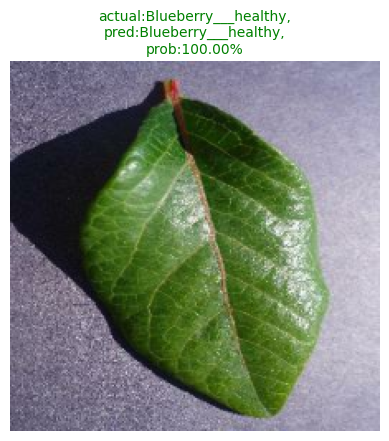

In [32]:
random_image_predict(feature_model)

1/1 [==============================] - 0s 55ms/step


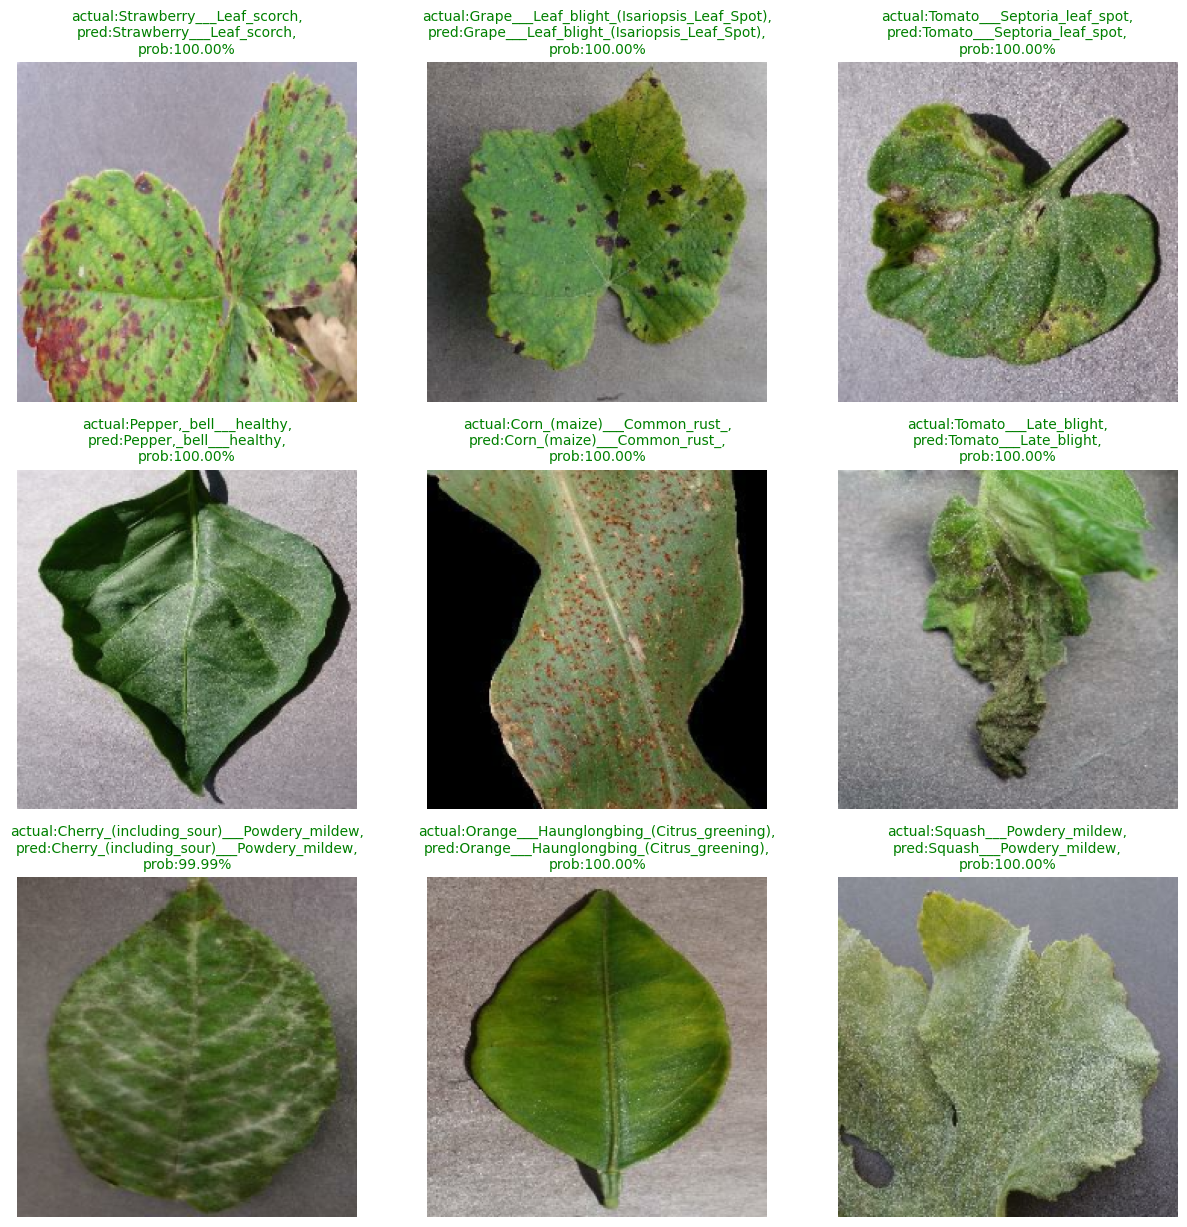

In [33]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  random_image_predict(feature_model,test_dir)

1/1 [==============================] - 0s 55ms/step


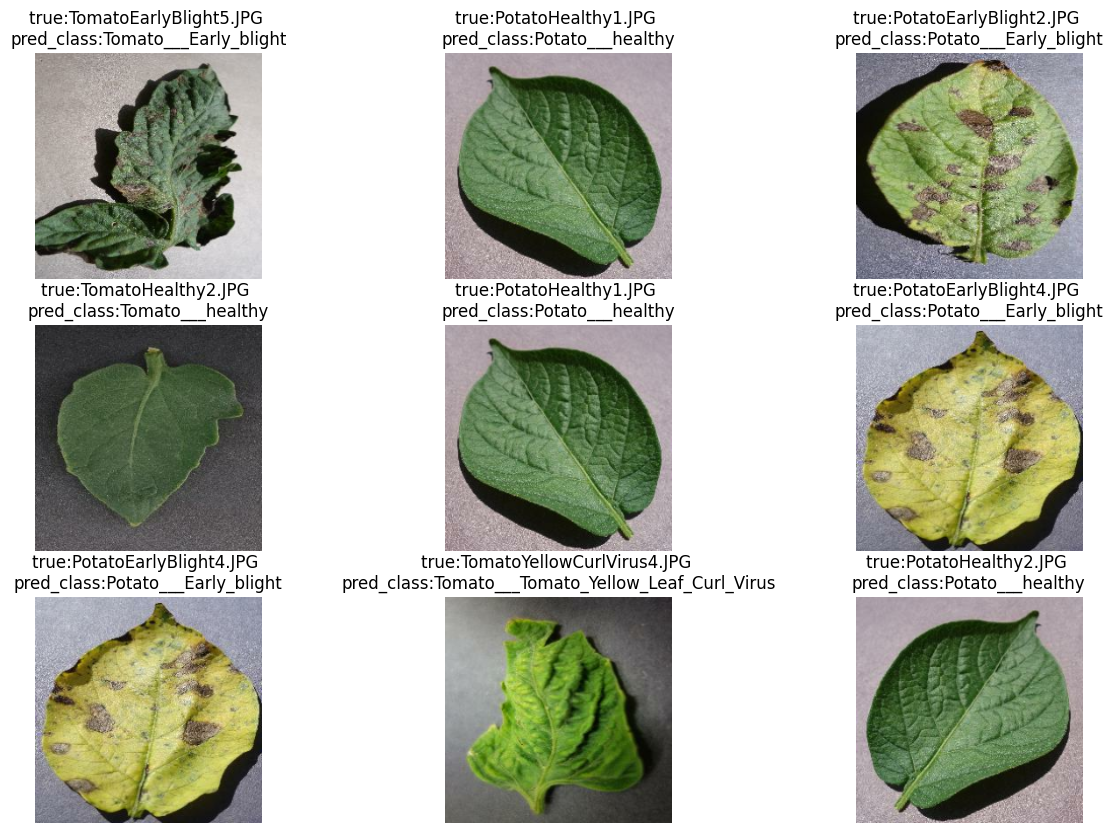

In [34]:
data_dir='/kaggle/input/new-plant-diseases-dataset/test/test'
plt.figure(figsize=(15,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  rn = random.choice(os.listdir(data_dir))
  image_path=os.path.join(data_dir,rn)
  img = load_prep(image_path)
  pred = feature_model.predict(tf.expand_dims(img,axis=0))
  pred_name = class_names[pred.argmax()]
  plt.imshow(img/255.)
  plt.title(f'true:{rn} \npred_class:{pred_name}')
  plt.axis(False)
  

## lets download some image on google

In [35]:
def predict_img(img_path,model=feature_model,):
  img = load_prep(img_path)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_name = class_names[pred.argmax()]

  plt.imshow(img/255.)
  plt.title(f'predicted_class : {pred_name}')
  plt.axis(False)

In [36]:
!wget https://www.apsnet.org/edcenter/disandpath/fungalasco/pdlessons/Article%20Images/AppleScab03.jpg

--2024-04-28 19:50:31--  https://www.apsnet.org/edcenter/disandpath/fungalasco/pdlessons/Article%20Images/AppleScab03.jpg
Resolving www.apsnet.org (www.apsnet.org)... 3.216.53.172
Connecting to www.apsnet.org (www.apsnet.org)|3.216.53.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30646 (30K) [image/jpeg]
Saving to: 'AppleScab03.jpg'

AppleScab03.jpg     100%[===================>]  29.93K  --.-KB/s    in 0.06s   

2024-04-28 19:50:32 (475 KB/s) - 'AppleScab03.jpg' saved [30646/30646]



1/1 [==============================] - 0s 61ms/step


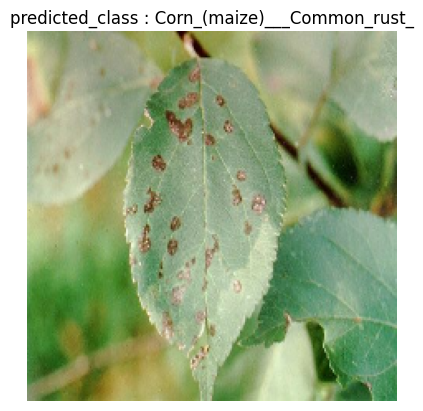

In [37]:
predict_img('AppleScab03.jpg')

In [38]:
!wget https://www.wiscontext.org/sites/default/files/styles/article_full_size_image/public/assets/images/corn-southernrust-summer.jpg

--2024-04-28 19:50:33--  https://www.wiscontext.org/sites/default/files/styles/article_full_size_image/public/assets/images/corn-southernrust-summer.jpg
Resolving www.wiscontext.org (www.wiscontext.org)... 172.67.136.203, 104.21.81.14, 2606:4700:3030::ac43:88cb, ...
Connecting to www.wiscontext.org (www.wiscontext.org)|172.67.136.203|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://wiscontext.org/sites/default/files/styles/article_full_size_image/public/assets/images/corn-southernrust-summer.jpg [following]
--2024-04-28 19:50:33--  https://wiscontext.org/sites/default/files/styles/article_full_size_image/public/assets/images/corn-southernrust-summer.jpg
Resolving wiscontext.org (wiscontext.org)... 104.21.81.14, 172.67.136.203, 2606:4700:3030::ac43:88cb, ...
Connecting to wiscontext.org (wiscontext.org)|104.21.81.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 477131 (466K) [image/jpeg]
Saving to: 'corn-south

1/1 [==============================] - 0s 60ms/step


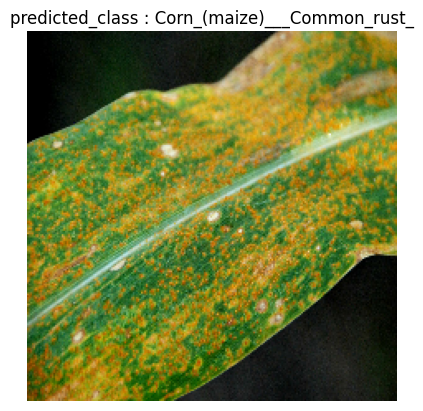

In [39]:
predict_img('corn-southernrust-summer.jpg')

In [40]:
!wget https://www.planetnatural.com/wp-content/uploads/2012/12/potato-blight.jpg

--2024-04-28 19:50:35--  https://www.planetnatural.com/wp-content/uploads/2012/12/potato-blight.jpg
Resolving www.planetnatural.com (www.planetnatural.com)... 104.18.4.29, 104.18.5.29, 2606:4700::6812:41d, ...
Connecting to www.planetnatural.com (www.planetnatural.com)|104.18.4.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99069 (97K) [image/jpeg]
Saving to: 'potato-blight.jpg'

potato-blight.jpg   100%[===================>]  96.75K  --.-KB/s    in 0.02s   

2024-04-28 19:50:36 (5.43 MB/s) - 'potato-blight.jpg' saved [99069/99069]



1/1 [==============================] - 0s 66ms/step


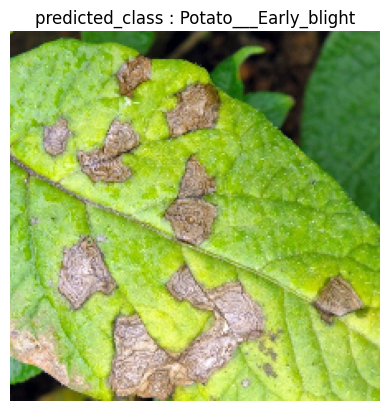

In [41]:
predict_img('potato-blight.jpg')

In [42]:
!wget https://content.peat-cloud.com/w400/black-rot-of-grape-grape-1575457334.jpg

--2024-04-28 19:50:37--  https://content.peat-cloud.com/w400/black-rot-of-grape-grape-1575457334.jpg
Resolving content.peat-cloud.com (content.peat-cloud.com)... 3.163.158.46, 3.163.158.76, 3.163.158.60, ...
Connecting to content.peat-cloud.com (content.peat-cloud.com)|3.163.158.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20361 (20K) [image/jpeg]
Saving to: 'black-rot-of-grape-grape-1575457334.jpg'

black-rot-of-grape- 100%[===================>]  19.88K  --.-KB/s    in 0.1s    

2024-04-28 19:50:38 (146 KB/s) - 'black-rot-of-grape-grape-1575457334.jpg' saved [20361/20361]



1/1 [==============================] - 0s 59ms/step


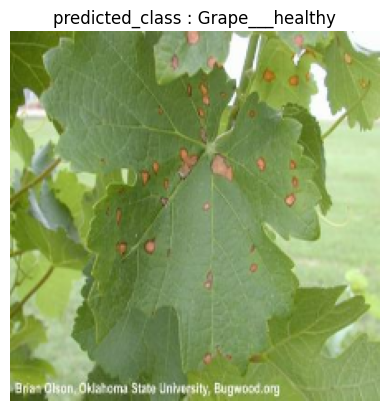

In [43]:
predict_img('black-rot-of-grape-grape-1575457334.jpg')

In [44]:
!wget https://cdn.shopify.com/s/files/1/1093/4358/files/Depositphotos_160089900_l-2015_large.jpg

--2024-04-28 19:50:39--  https://cdn.shopify.com/s/files/1/1093/4358/files/Depositphotos_160089900_l-2015_large.jpg
Resolving cdn.shopify.com (cdn.shopify.com)... 23.227.60.200, 2620:127:f00f:ff01::
Connecting to cdn.shopify.com (cdn.shopify.com)|23.227.60.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28240 (28K) [image/jpeg]
Saving to: 'Depositphotos_160089900_l-2015_large.jpg'

Depositphotos_16008 100%[===================>]  27.58K  --.-KB/s    in 0s      

2024-04-28 19:50:40 (62.0 MB/s) - 'Depositphotos_160089900_l-2015_large.jpg' saved [28240/28240]



1/1 [==============================] - 0s 65ms/step


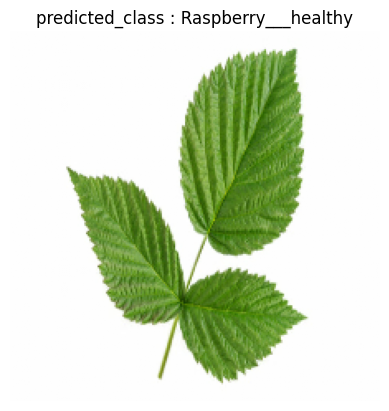

In [45]:
predict_img('Depositphotos_160089900_l-2015_large.jpg')

In [46]:
!wget https://www.rosbreed.org/sites/default/files/pm%20cherry%20leaf.jpg

--2024-04-28 19:50:41--  https://www.rosbreed.org/sites/default/files/pm%20cherry%20leaf.jpg
Resolving www.rosbreed.org (www.rosbreed.org)... 134.121.193.87
Connecting to www.rosbreed.org (www.rosbreed.org)|134.121.193.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246531 (241K) [image/jpeg]
Saving to: 'pm cherry leaf.jpg'

pm cherry leaf.jpg  100%[===================>] 240.75K  --.-KB/s    in 0.07s   

2024-04-28 19:50:41 (3.55 MB/s) - 'pm cherry leaf.jpg' saved [246531/246531]



1/1 [==============================] - 0s 65ms/step


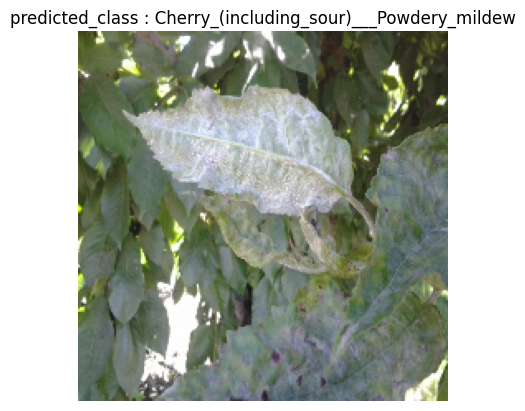

In [47]:
predict_img('pm cherry leaf.jpg')